## Tracking daily changes in historic Agroclimatological Data  
In this notebook we are extracting historic daily agroclimatological data using NASA Power DAV Tool from March 1st, 2024 to Oct 1st, 2024. Below is a image of the region of data we are observing from Ivory Coast.

<img src="Images/Cocoa_Region.png" alt="Cocoa Regional Map of Ivory Coast" style="width:40%; display: block; margin: 0 auto;">

### Import Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Inital Data Analysis

In [2]:
df = pd.read_csv('Agroclimatological_NASA_Data.csv', on_bad_lines='skip') 
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LAT          20640 non-null  float64
 1   LON          20640 non-null  float64
 2   YEAR         20640 non-null  int64  
 3   DOY          20640 non-null  int64  
 4   TS           20640 non-null  float64
 5   RH2M         20640 non-null  float64
 6   GWETROOT     20640 non-null  float64
 7   PRECTOTCORR  20640 non-null  float64
 8   T2M_MIN      20640 non-null  float64
 9   T2M_RANGE    20640 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.6 MB


(    LAT   LON  YEAR  DOY     TS   RH2M  GWETROOT  PRECTOTCORR  T2M_MIN  \
 0  4.75 -8.25  2024   61  27.36  84.73      0.52         5.06    25.66   
 1  4.75 -7.75  2024   61  27.21  83.88      0.51         4.17    25.28   
 2  4.75 -7.25  2024   61  27.21  84.68      0.53         5.12    25.30   
 3  4.75 -6.75  2024   61  27.26  86.74      0.58         8.10    25.74   
 4  4.75 -6.25  2024   61  27.85  86.09      0.52         6.88    26.59   
 
    T2M_RANGE  
 0       2.36  
 1       3.61  
 2       3.82  
 3       2.73  
 4       1.67  ,
 None)

<Figure size 1600x1000 with 0 Axes>

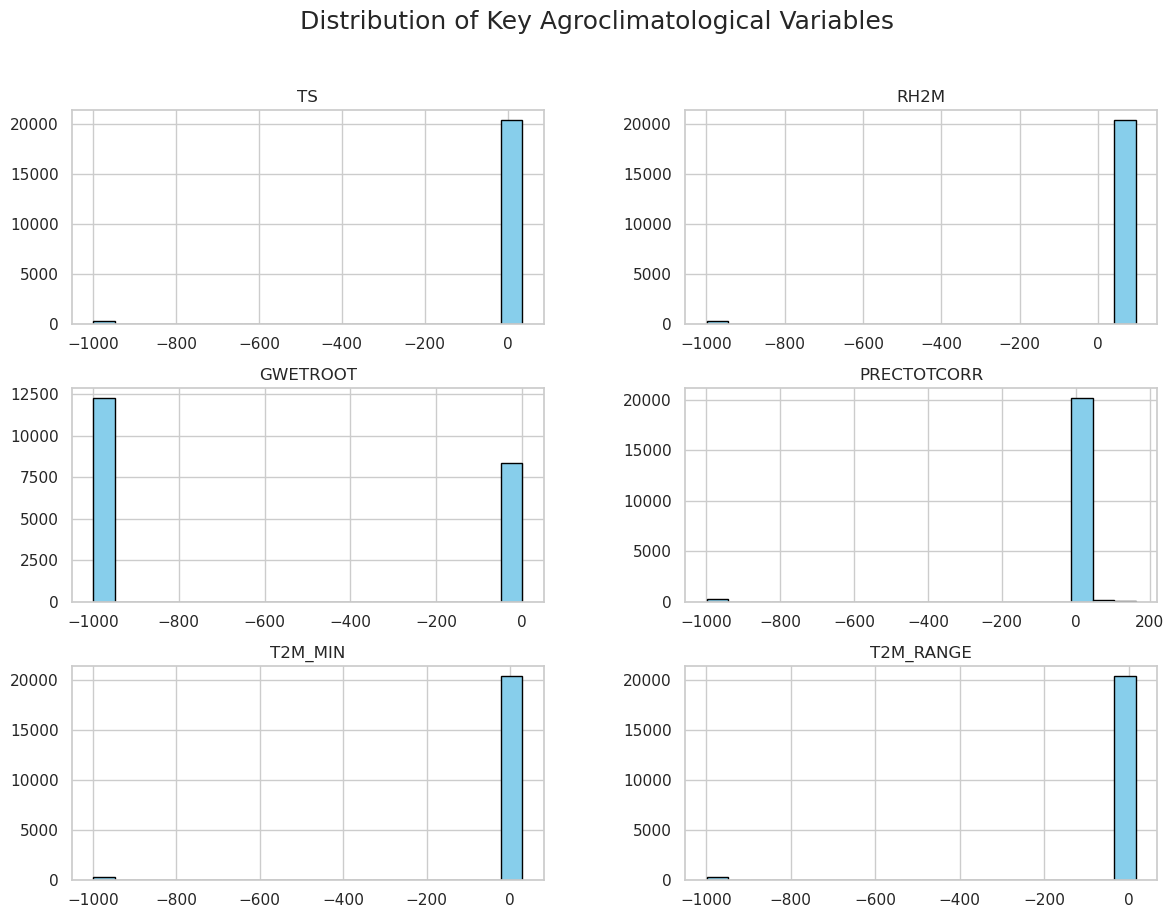

In [3]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Histograms of the key weather variables
df[['TS', 'RH2M', 'GWETROOT', 'PRECTOTCORR', 'T2M_MIN', 'T2M_RANGE']].hist(bins=20, figsize=(14,10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Key Agroclimatological Variables", fontsize=18)
plt.show()

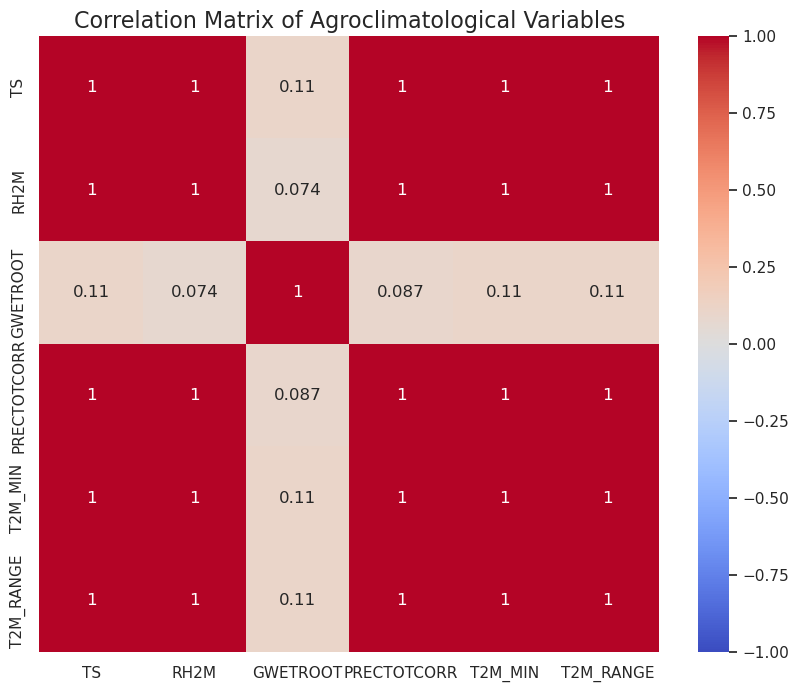

In [4]:
# Calculate correlation matrix
correlation_matrix = df[['TS', 'RH2M', 'GWETROOT', 'PRECTOTCORR', 'T2M_MIN', 'T2M_RANGE']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Agroclimatological Variables", fontsize=16)
plt.show()

In [5]:
# Correlation Matrix (version 2)

# Previous graph seemed skewed due to extreme values, so I calculated the z-score to remove extremes/ outliers
key_vars = ['TS', 'RH2M', 'GWETROOT', 'PRECTOTCORR', 'T2M_MIN', 'T2M_RANGE']
zscore = np.abs((df[key_vars] - df[key_vars].mean()) / df[key_vars].std())
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Calculate correlation matrix
correlation_matrix = df_no_outliers[key_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Agroclimatological Variables", fontsize=16)
plt.show()

NameError: name 'z_scores' is not defined

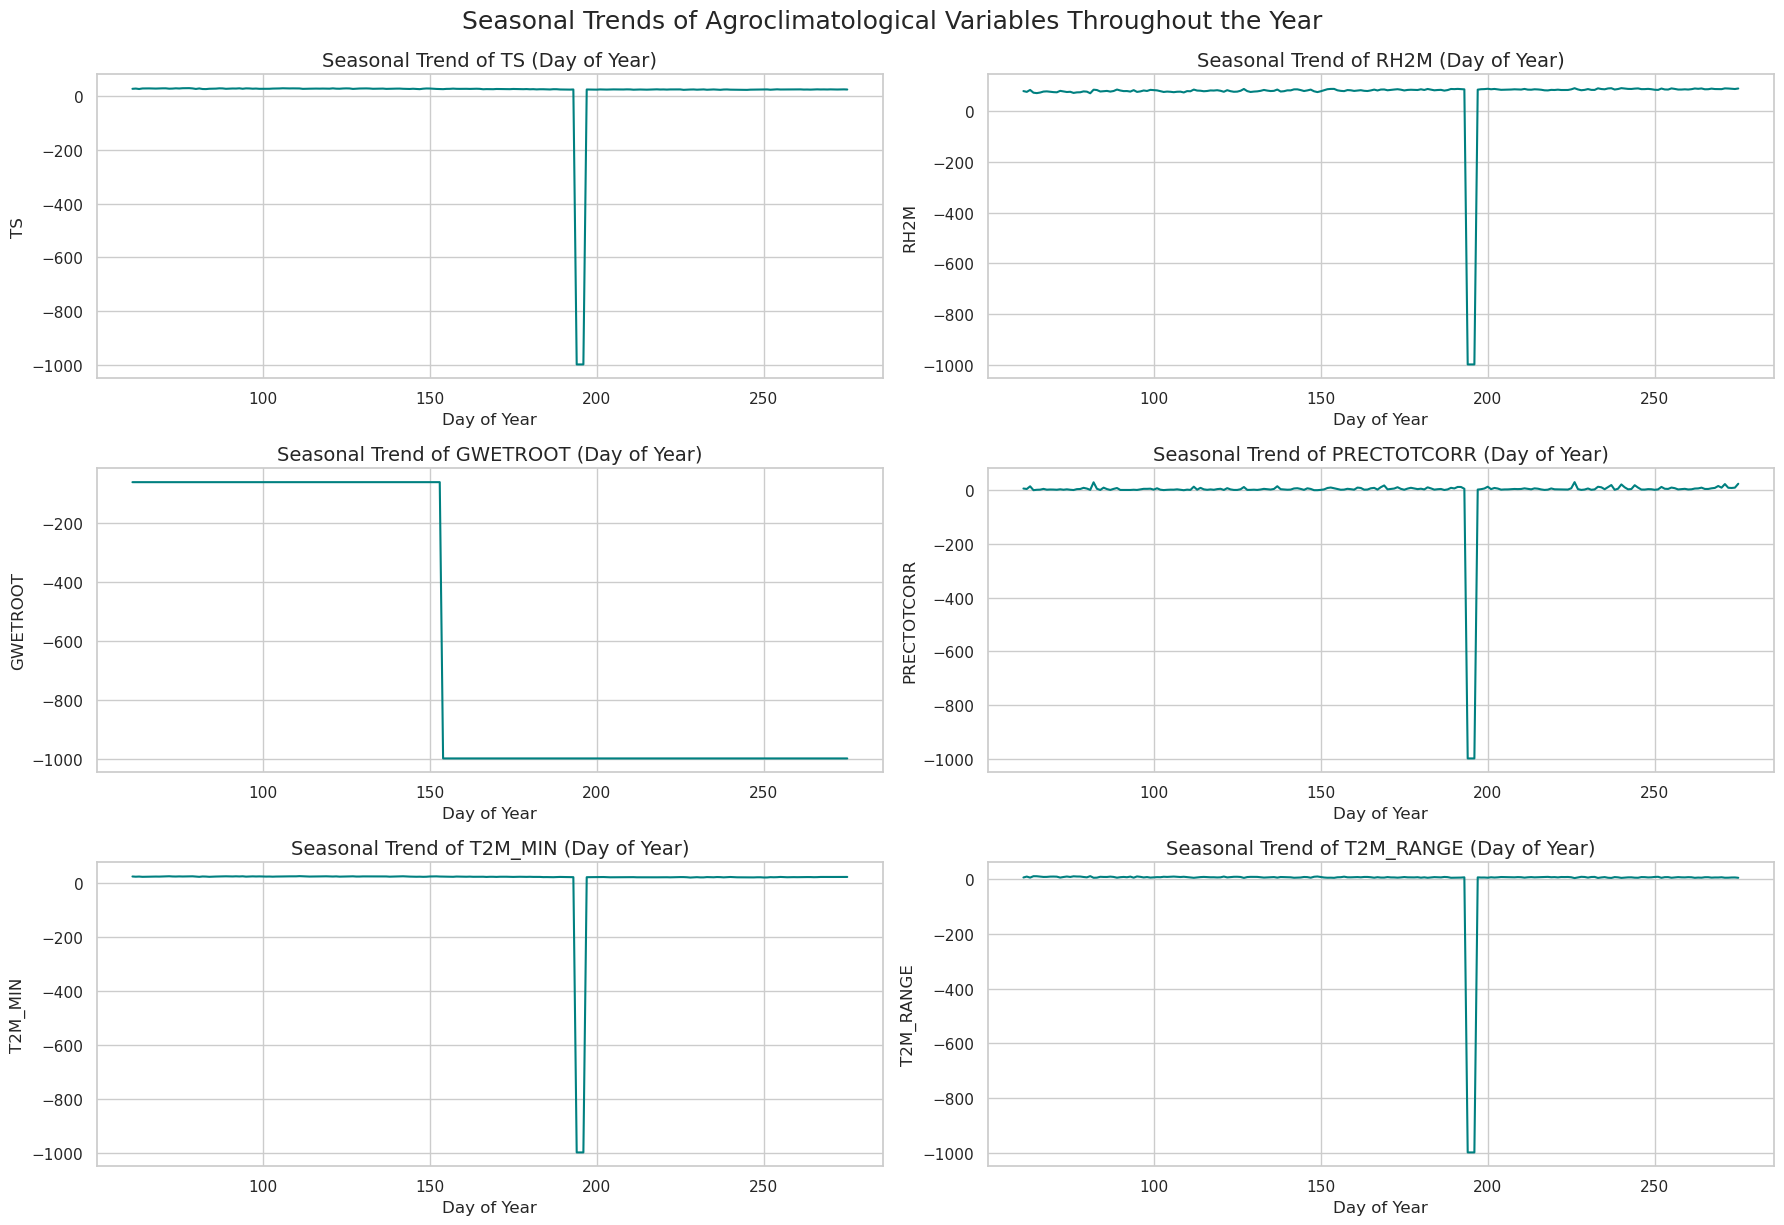

In [6]:
# Plot seasonal trends using 'DOY' (Day of the Year) to see variations in each variable throughout the year
plt.figure(figsize=(18, 12))

# Variables to examine by DOY
variables = ['TS', 'RH2M', 'GWETROOT', 'PRECTOTCORR', 'T2M_MIN', 'T2M_RANGE']

# Plot each variable
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    sns.lineplot(x='DOY', y=var, data=df, estimator='mean', errorbar=None, color="teal")
    plt.title(f"Seasonal Trend of {var} (Day of Year)", fontsize=14)
    plt.xlabel("Day of Year")
    plt.ylabel(var)

plt.tight_layout()
plt.suptitle("Seasonal Trends of Agroclimatological Variables Throughout the Year", fontsize=18, y=1.02)
plt.show()

# Cleaning Data

In [29]:
# Rename columns
df = df.rename(columns={
    'TS': 'Earth_Skin_Temp',
    'RH2M': 'Rel_Humidity',
    'GWETROOT': 'Root_Soil_Wetness',
    'PRECTOTCORR': 'Precip_Corrected',
    'T2M_MIN': 'Temp_Min',
    'T2M_RANGE': 'Temp_Range'
})

# Create Temp_Max as the sum of Temp_Min and Temp_Range
df['Temp_Max'] = df['Temp_Min'] + df['Temp_Range']

# Display the first few rows of the DataFrame to verify
df.head()

,LAT,LON,YEAR,DOY,Earth_Skin_Temp,Rel_Humidity,Root_Soil_Wetness,Precip_Corrected,Temp_Min,Temp_Range,Temp_Max
0,4.75,-8.25,2024,61,27.36,84.73,0.52,5.06,25.66,2.36,28.02
1,4.75,-7.75,2024,61,27.21,83.88,0.51,4.17,25.28,3.61,28.89
2,4.75,-7.25,2024,61,27.21,84.68,0.53,5.12,25.30,3.82,29.12
3,4.75,-6.75,2024,61,27.26,86.74,0.58,8.10,25.74,2.73,28.47
4,4.75,-6.25,2024,61,27.85,86.09,0.52,6.88,26.59,1.67,28.26


In [30]:
# Columns to clean
columns_to_clean = ['Earth_Skin_Temp', 'Rel_Humidity', 'Root_Soil_Wetness', 'Precip_Corrected', 'Temp_Min', 'Temp_Range', 'Temp_Max']

# Replace values below -999 with NaN in specified columns
df[columns_to_clean] = df[columns_to_clean].map(lambda x: np.nan if x < -999 else x)

# Drop rows with NaN in any of these columns
df_cleaned = df.dropna(subset=columns_to_clean)

# Display cleaned DataFrame
df_cleaned.head()

,LAT,LON,YEAR,DOY,Earth_Skin_Temp,Rel_Humidity,Root_Soil_Wetness,Precip_Corrected,Temp_Min,Temp_Range,Temp_Max
0,4.75,-8.25,2024,61,27.36,84.73,0.52,5.06,25.66,2.36,28.02
1,4.75,-7.75,2024,61,27.21,83.88,0.51,4.17,25.28,3.61,28.89
2,4.75,-7.25,2024,61,27.21,84.68,0.53,5.12,25.30,3.82,29.12
3,4.75,-6.75,2024,61,27.26,86.74,0.58,8.10,25.74,2.73,28.47
4,4.75,-6.25,2024,61,27.85,86.09,0.52,6.88,26.59,1.67,28.26


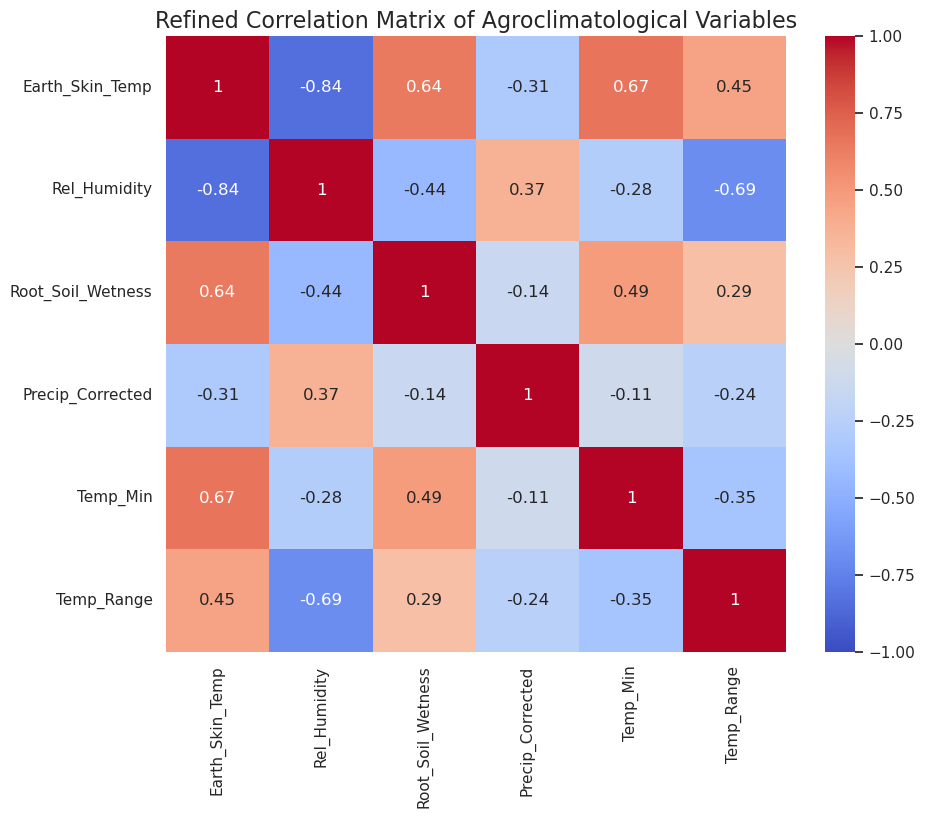

In [31]:
# Step 1: Define columns to clean and replace values below -999 with NaN
columns_to_clean = ['Earth_Skin_Temp', 'Rel_Humidity', 'Root_Soil_Wetness', 'Precip_Corrected', 'Temp_Min', 'Temp_Range', 'Temp_Max']
df[columns_to_clean] = df[columns_to_clean].map(lambda x: np.nan if x < -999 else x)

# Step 2: Drop rows with NaN in the specified columns to create df_cleaned
df_cleaned = df.dropna(subset=columns_to_clean)

# Step 3: Drop the derived 'Temp_Max' column from df_cleaned to avoid redundancy
df_cleaned = df_cleaned.drop(columns=['Temp_Max'])

# Now df_cleaned should be defined, and you can calculate the correlation matrix
correlation_matrix = df_cleaned[columns_to_clean[:-1]].corr()  # Exclude 'Temp_Max' here too

# Plot the refined correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Refined Correlation Matrix of Agroclimatological Variables", fontsize=16)
plt.show()


In [32]:
# Double check we dropped apprpriate number of rows
null_rows = df.isnull().any(axis=1).sum()
print(null_rows)
print(df_cleaned.shape)

288
(20352, 10)


In [33]:
# Set plot style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Histograms of the key weather variables
df_cleaned[columns_to_clean].hist(bins=20, figsize=(14,10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Key Agroclimatological Variables", fontsize=18)
plt.show()

KeyError: "['Temp_Max'] not in index"

<Figure size 1600x1000 with 0 Axes>

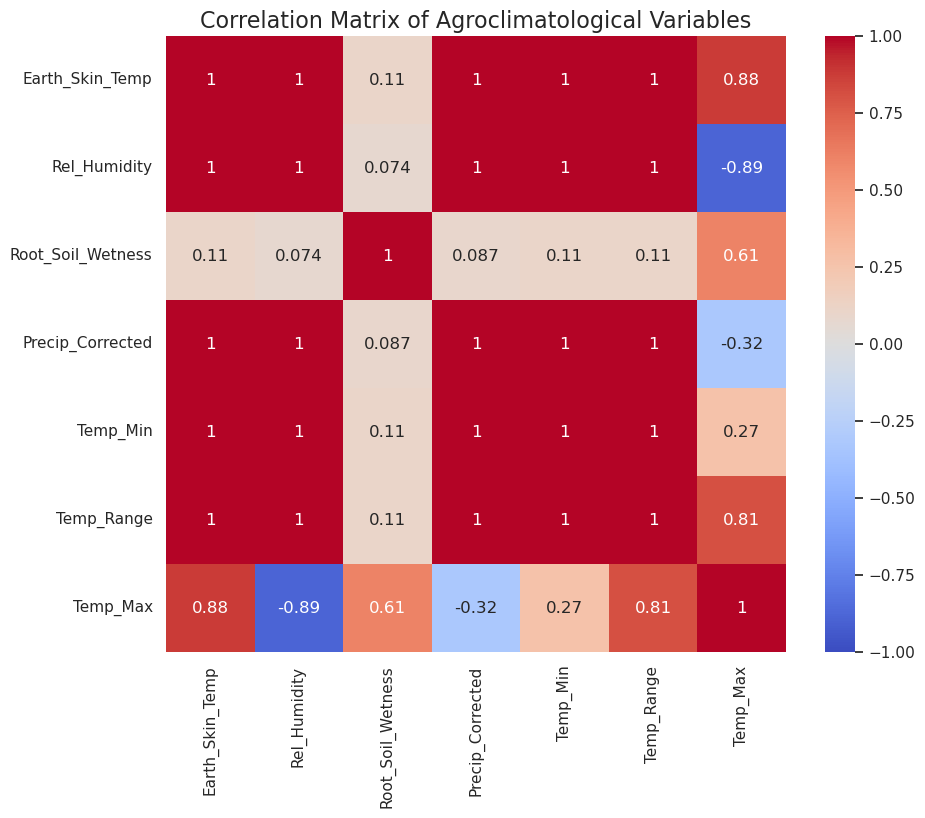

In [34]:
# Calculate correlation matrix
correlation_matrix = df[columns_to_clean].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Agroclimatological Variables", fontsize=16)
plt.show()

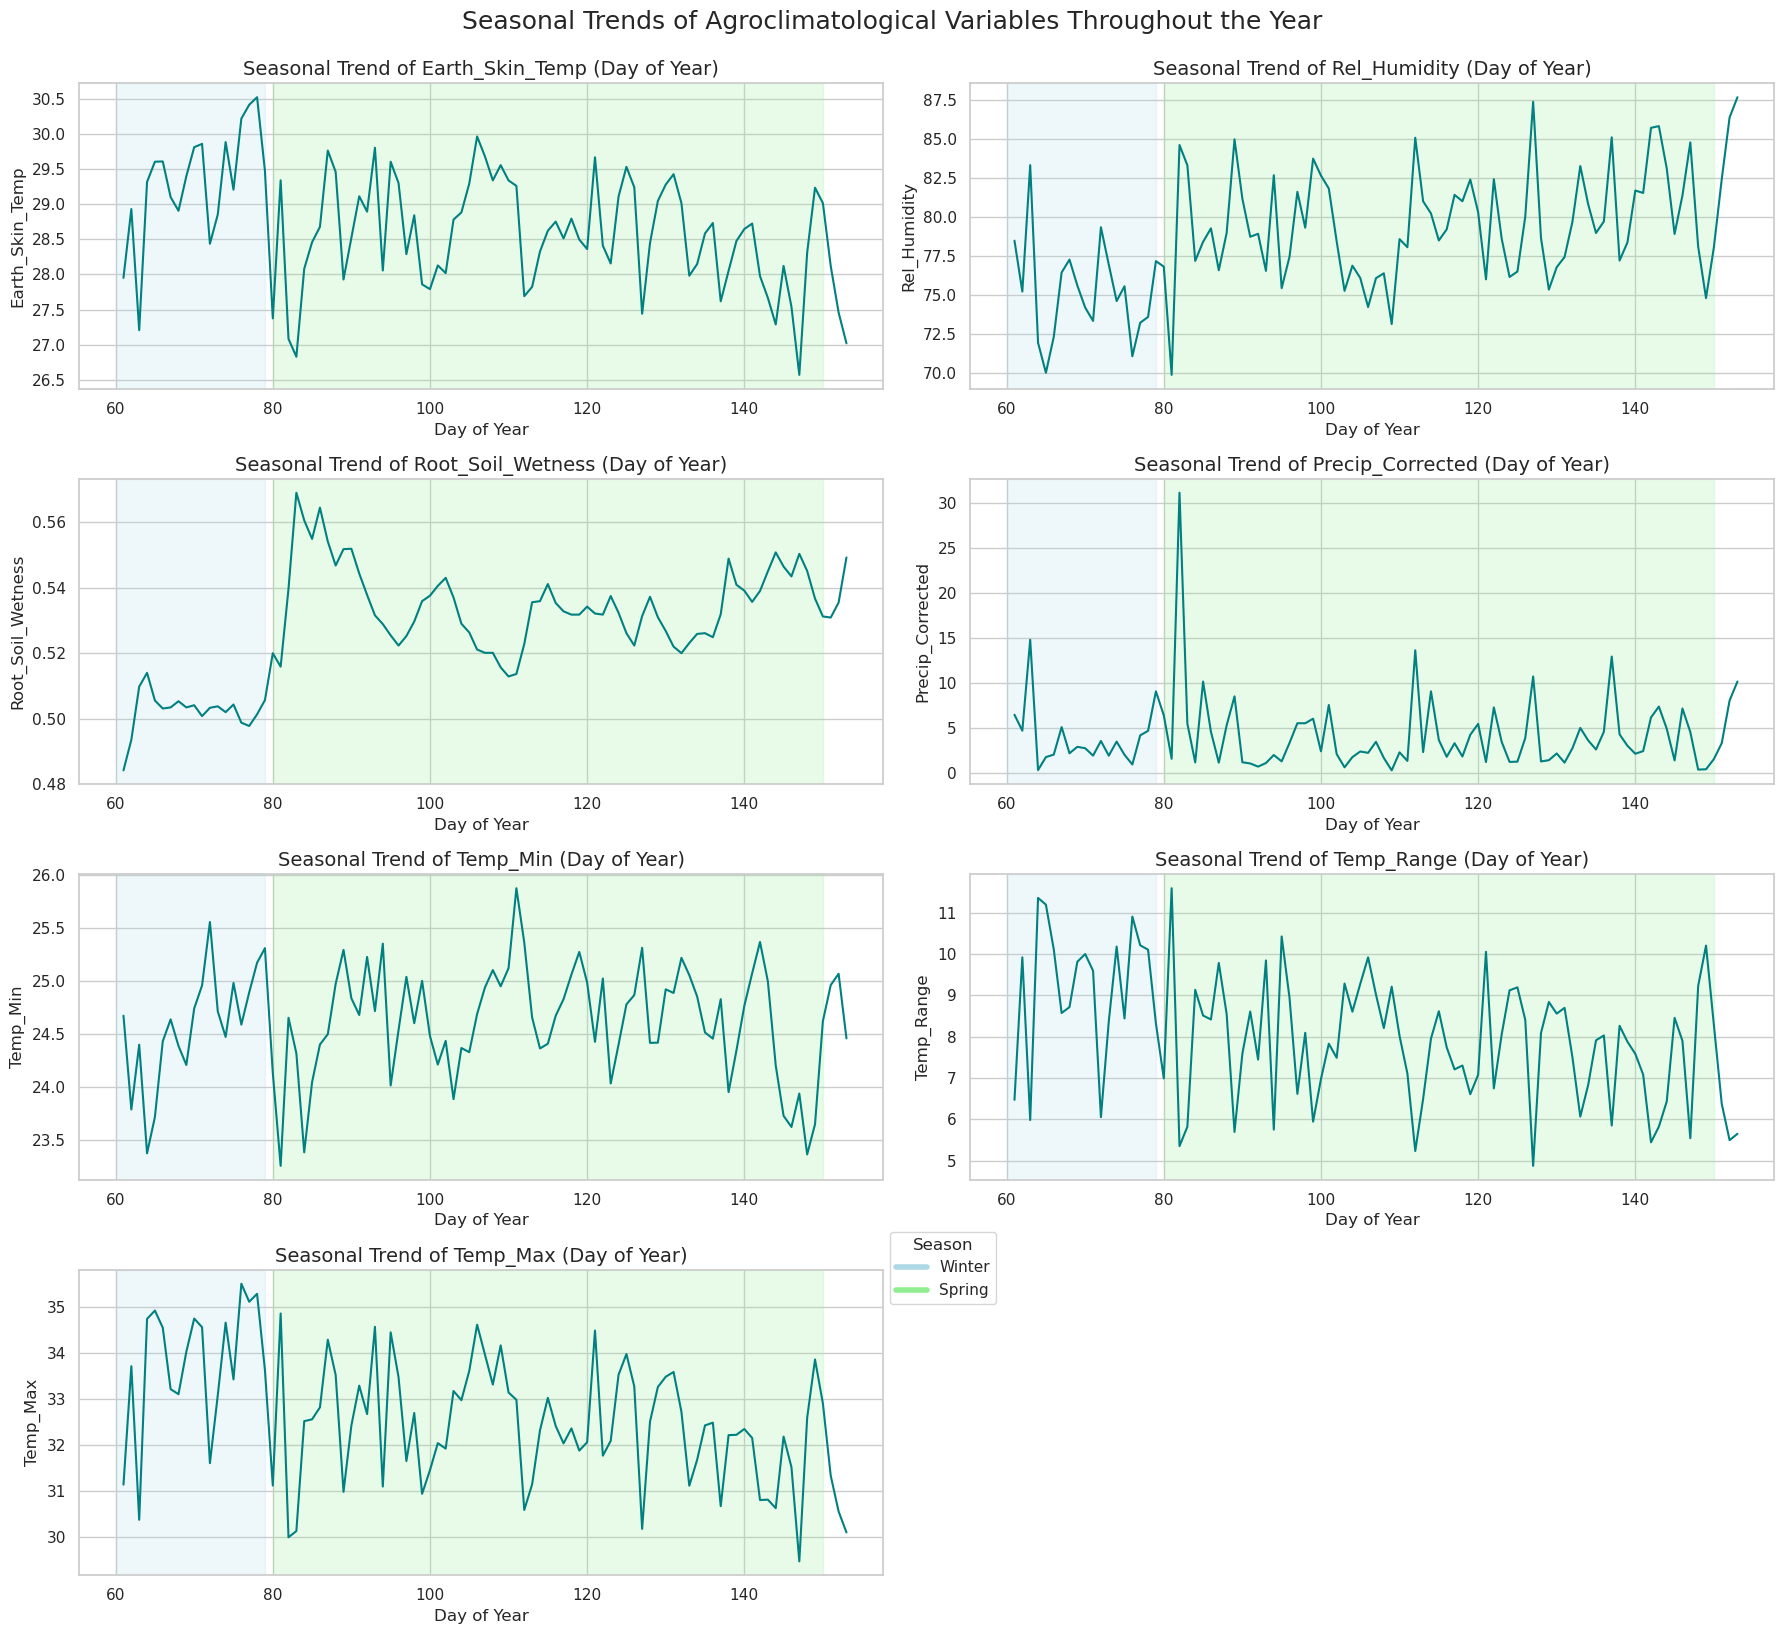

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define variables and filter large negative values
variables = columns_to_clean
threshold = -100  # Adjust as needed for your data
df_cleaned = df_cleaned[(df_cleaned[variables] > threshold).all(axis=1)]

# Define the seasons and their respective color for shading
seasons = {
    # "Winter": (1, 79, 'lightblue'),
    "Winter": (60, 79, 'lightblue'),
    # "Spring": (80, 171, 'lightgreen'),
    "Spring": (80, 150, 'lightgreen'),
    # "Summer": (172, 263, 'lightyellow'),
    # "Fall": (264, 365, 'lightcoral')
}

# Determine the number of rows needed for subplots based on variable count
num_vars = len(variables)
rows = (num_vars + 1) // 2  # Adjust rows for an even number of plots

# Set up the plot
plt.figure(figsize=(18, 4 * rows))

# Plot each variable with DOY (Day of the Year) as the x-axis
for i, var in enumerate(variables, 1):
    plt.subplot(rows, 2, i)
    sns.lineplot(x='DOY', y=var, data=df_cleaned, estimator='mean', errorbar=None, color="teal")
    plt.title(f"Seasonal Trend of {var} (Day of Year)", fontsize=14)
    plt.xlabel("Day of Year")
    plt.ylabel(var)

    # Highlight each season on the plot
    for season, (start, end, color) in seasons.items():
        plt.axvspan(start, end, color=color, alpha=0.2)

# Create custom legend handles
legend_handles = [plt.Line2D([0], [0], color=color, lw=4) for season, (start, end, color) in seasons.items()]

# Adjust layout and add a common title and legend
plt.tight_layout()
plt.suptitle("Seasonal Trends of Agroclimatological Variables Throughout the Year", fontsize=18, y=1.02)
plt.legend(legend_handles, seasons.keys(), loc="upper right", bbox_to_anchor=(1.15, 1.15), title="Season")

plt.show()
